In [8]:
import romainLegConfig
reload(romainLegConfig)
from romainLegConfig import bottomconf as conf
import multiResData
reload(multiResData)

multiResData.createTFRecordFromLbl(conf,split=False)

Done 0 of 3 movies, count:471 val:0
Done 1 of 3 movies, count:614 val:0
Done 2 of 3 movies, count:669 val:0
669,0 number of pos examples added to the db and valdb


In [1]:
import PoseTrain
reload(PoseTrain)
from romainLegConfig import bottomconf as conf
import tensorflow as tf

tf.reset_default_graph()
pobj = PoseTrain.PoseTrain(conf)
pobj.baseTrain(restore=False,trainType=1)

Not loading base variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 227303.172,208.9, Val = 224804.907,179.8
Saved state to /home/mayank/work/poseEstimation/cache/romainLegBottom/romainLegBase-0
Iter 30, Train = 3537.158,211.6, Val = 3651.663,222.3
Iter 60, Train = 1151.419,202.7, Val = 1321.881,194.3
Iter 90, Train = 1080.442,129.7, Val = 1070.149,148.2
Iter 120, Train = 987.730,142.9, Val = 1036.149,124.6
Iter 150, Train = 1006.077,129.2, Val = 1000.889,121.9
Iter 180, Train = 1310.636,128.8, Val = 1113.558,134.5
Iter 210, Train = 976.688,94.3, Val = 1103.649,120.4
Iter 240, Train = 964.714,93.1, Val = 1067.630,80.3
Iter 270, Train = 998.447,87.1, Val = 1015.367,84.5
Iter 300, Train = 1109.594,114.4, Val = 959.556,90.6
Iter 330, Train = 1040.561,67.8, Val = 979.904,81.4
Iter 360, Train = 946.025,53.2, Val = 1120.917,111.5
Iter 390, Train = 955.434,68.5, Val = 1108.989,74.3
Iter 420, Train = 1004.157,113.9, Val = 1008.6

In [ ]:
import PoseTrain
reload(PoseTrain)
from romainLegConfig import bottomconf as conf
import tensorflow as tf

tf.reset_default_graph()
pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=True,trainType=1)

!!!Overriding MRF Size using conf.mrf_psz!!!
!!!Overriding MRF Size using conf.mrf_psz!!!
!!!Overriding MRF Size using conf.mrf_psz!!!
Loading base from /home/mayank/work/poseEstimation/cache/romainLegBottom/romainLegBase-5000
Parameters that dont match for mrf:
brange doesnt match
crange doesnt match
selpts
New: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Old: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Loading mrf variables from /home/mayank/work/poseEstimation/cache/romainLegBottom/romainLegMRF-1500
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Initializing variable:mrf/mrf/weights/Adam:0
Initializing variable:mrf/mrf/weights/Adam_1:0
Initializing variable:mrf/mrf/biases/Adam:0
Initializing variable:mrf/mrf/biases/Adam_1:0

In [4]:
import pickle
kk = pickle.load(open('/home/mayank/temp/temp.p','rb'))

Populating the interactive namespace from numpy and matplotlib
(75, 75, 18, 18)


<IPython.core.display.Javascript object>


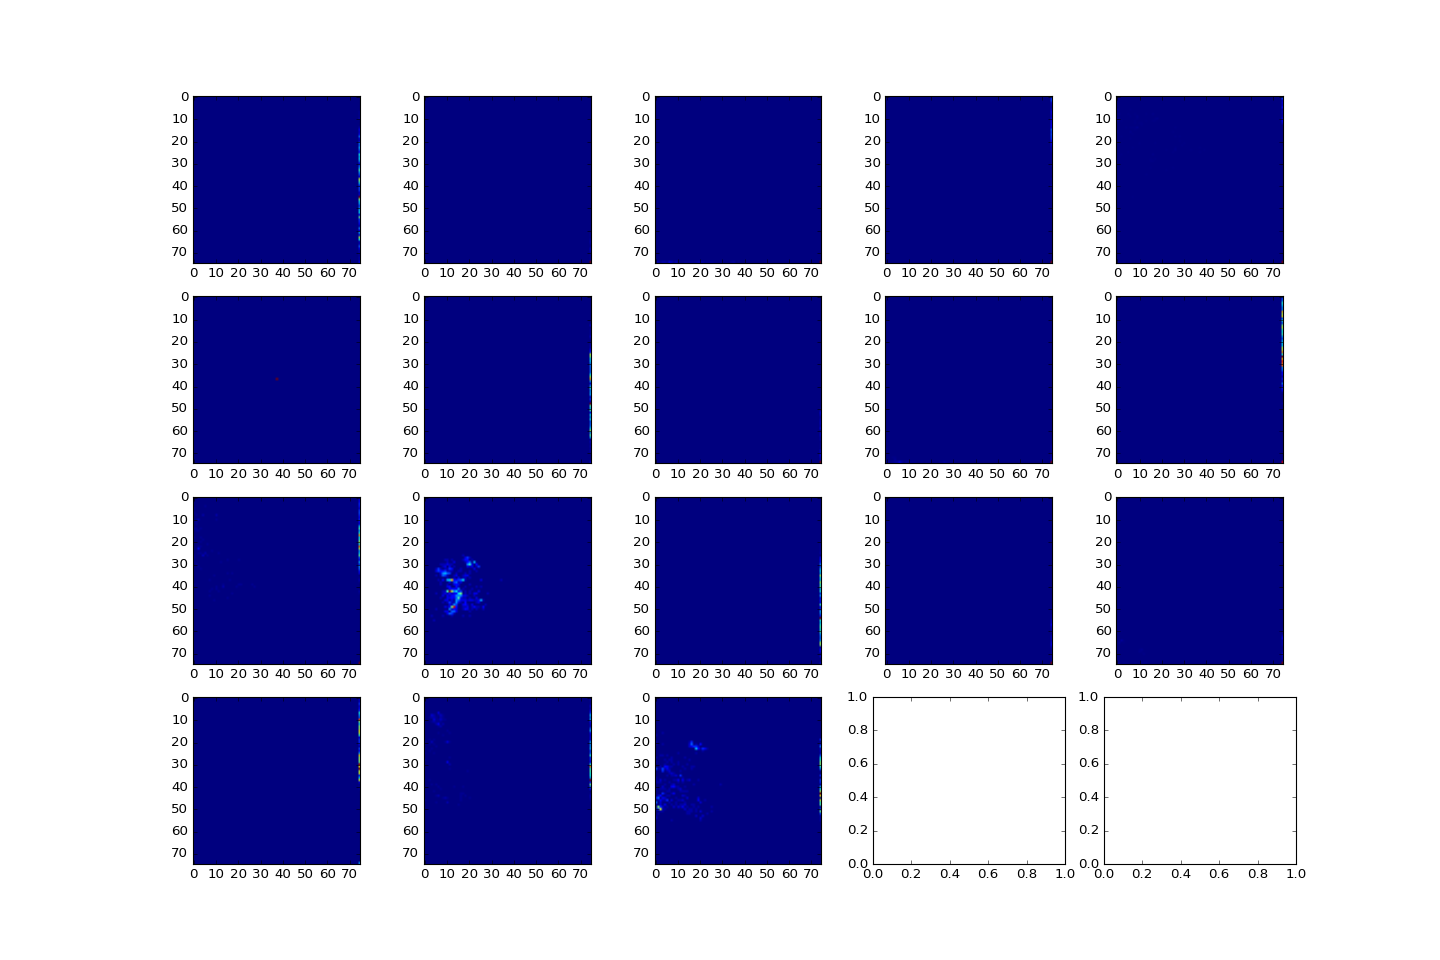

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: Deprecation

In [5]:
%pylab notebook
print kk['tt'].shape
jj = kk['tt']
spt = 5
fig,ax = plt.subplots(4,5,figsize=(18,12))
ax = ax.flatten()
for ndx in range(jj.shape[3]):
    ax[ndx].imshow(kk['tt'][...,spt,ndx])

In [18]:
import h5py
L = h5py.File(conf.labelfile)
print conf.labelfile
print L.keys()
pp = np.array(L['labeledpos'])
curpts = np.array(L[pp[0,1]])
print curpts.shape
frames = np.where(np.invert( np.isnan(curpts[:,0,0])))[0]
nptsPerView = np.array(L['cfg']['NumLabelPoints'])[0,0]
pts_st = int(conf.view*nptsPerView)
selpts = pts_st + conf.selpts
cc = curpts[:,:,selpts]
cc = cc[frames,:,:]
cc = cc.transpose([0,2,1])
print cc.shape
hh = np.zeros([0,18,2])
hh = np.append(hh,cc,axis=0)

print hh.shape

/home/mayank/work/poseEstimation/RomainLeg/Apr28AndJun22.lbl
[u'#refs#', u'cfg', u'labeledpos', u'movieFilesAll']
(9440, 2, 18)
(143, 18, 2)
(143, 18, 2)


In [1]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
import cv2
from cvc import cvc

from romainLegConfig import bottomconf as conf
conf.useMRF = True
outtype = 2
extrastr = ''
redo = True

tf.reset_default_graph()

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

!!!Overriding MRF Size using conf.mrf_psz!!!
!!!Overriding MRF Size using conf.mrf_psz!!!
!!!Overriding MRF Size using conf.mrf_psz!!!
Parameters that dont match for base:
brange doesnt match
crange doesnt match
selpts
New: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Old: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Loading base variables from /home/mayank/work/poseEstimation/cache/romainLegBottom/romainLegBase-10000
Parameters that dont match for mrf:
brange doesnt match
crange doesnt match
selpts
New: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Old: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Loading mrf variables from /home/mayank/work/poseEstimation/cache/romainLegBottom/romainLegMRF-6000


In [2]:
valmovies = ['/home/mayank/Dropbox/MultiViewFlyLegTracking/trackingJun22-11-02/bias_video_cam_2_date_2016_06_22_time_11_02_28_v001.avi']
for ndx in range(len(valmovies)):
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
    pname = '/home/mayank/temp/romainOut/' + oname + extrastr
    if os.path.isfile(pname + '.mat') and not redo:
        continue
        
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess,maxframes=1000)
#     PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype,maxframes=1000)


    cap = cv2.VideoCapture(valmovies[ndx])
    height = int(cap.get(cvc.FRAME_HEIGHT))
    width = int(cap.get(cvc.FRAME_WIDTH))
    orig_crop_loc = conf.cropLoc[(height,width)]
    crop_loc = [x/4 for x in orig_crop_loc] 
    end_pad = [height/4-crop_loc[0]-conf.imsz[0]/4,width/4-crop_loc[1]-conf.imsz[1]/4]
    pp = [(0,0),(crop_loc[0],end_pad[0]),(crop_loc[1],end_pad[1]),(0,0),(0,0)]
    predScores = np.pad(predList[1],pp,mode='constant',constant_values=-1.)

    predLocs = predList[0]
    predLocs[:,:,:,0] += orig_crop_loc[1]
    predLocs[:,:,:,1] += orig_crop_loc[0]
    
    io.savemat(pname + '.mat',{'locs':predLocs,'scores':predScores[...,0],'expname':valmovies[ndx]})
    print 'Done:%s'%oname



....................
....................
....................
....................
....................
....................
.....Done:bias_video_cam_2_date_2016_06_22_time_11_02_28_v001.avi


In [12]:
%%prun -s cumulative
redo = True
valmovies = ['/home/mayank/Dropbox/MultiViewFlyLegTracking/trackingJun22-11-02/bias_video_cam_2_date_2016_06_22_time_11_02_28_v001.avi']
for ndx in range(len(valmovies)):
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
    pname = '/home/mayank/temp/romainOut/' + oname + extrastr
    if os.path.isfile(pname + '.mat') and not redo:
        continue
        
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess,maxframes=1000)



....................
....................
....................
....................
....................
....................
..... 

<IPython.core.display.Javascript object>


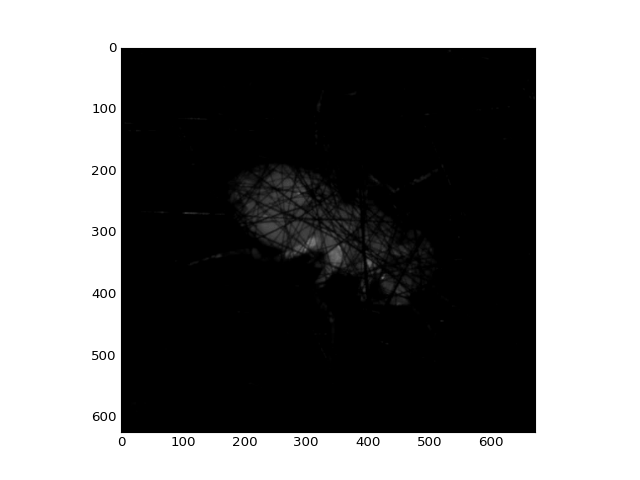

<IPython.core.display.Javascript object>


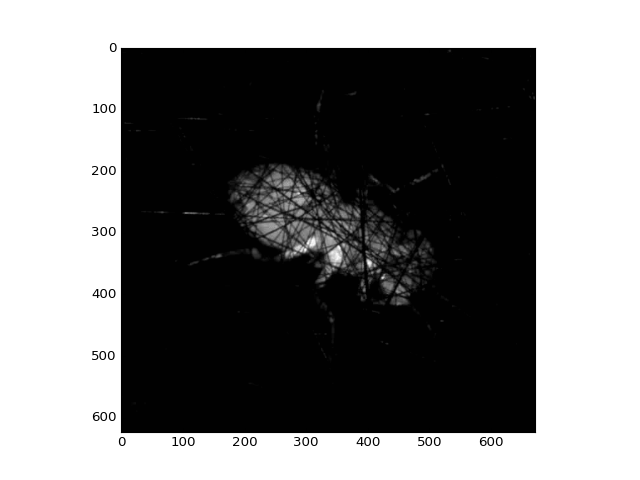

In [18]:
import cv2
import cvc
cap = cv2.VideoCapture('/home/mayank/Dropbox/MultiViewFlyLegTracking/trackingJun22-11-02/bias_video_cam_2_date_2016_06_22_time_11_02_28_v001.avi')
s,i = cap.read()
fig, ax = plt.subplots()
ax.imshow(i)

gsize = 50
i_grey = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(gsize,gsize))
ci = clahe.apply(i_grey)
fig, ax = plt.subplots()
ax.imshow(ci,cmap='gray')


In [2]:
%pylab notebook

import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/ipykernel/.*')
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/widgets/.*')

Populating the interactive namespace from numpy and matplotlib
